In [1]:
# Importar bibliotecas
import pandas as pd
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importar dados
dataset = pd.read_csv('tempo.csv', sep = ';')
# Visualizar dados
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


# Análise Exploratória

## Dados Categóricos

In [3]:
# Aparência
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

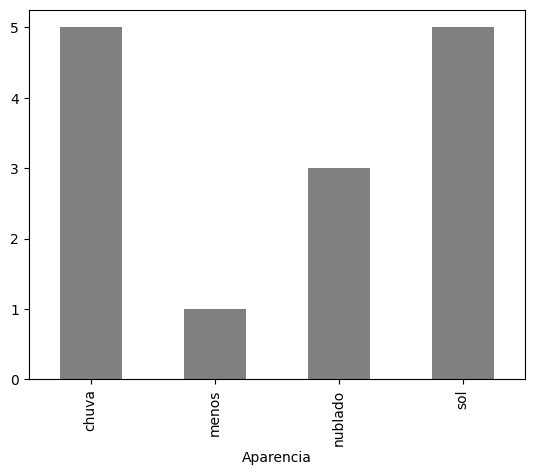

In [4]:
agrupado.plot.bar(color = 'gray')

Na coluna "Aparencia", os valores "menos" devem ser modificados. 

In [5]:
# Vento
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<Axes: xlabel='Vento'>

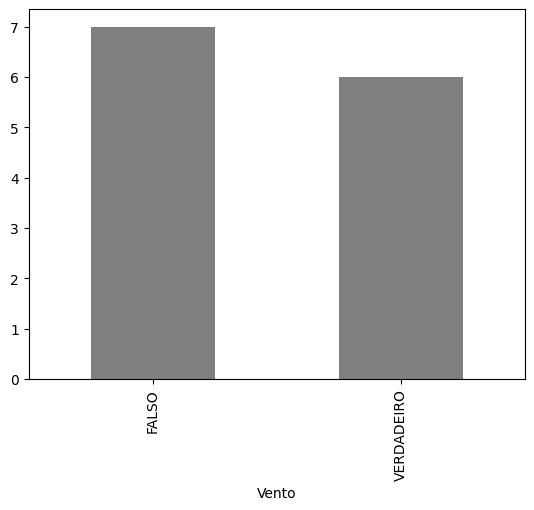

In [6]:
agrupado.plot.bar(color = 'gray')

A coluna "Vento" possui dados normais

In [7]:
# Jogar
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

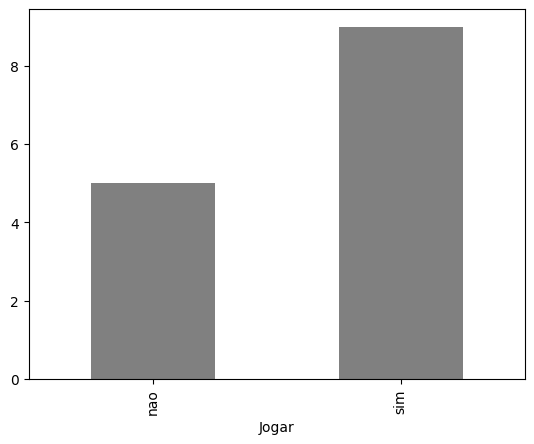

In [8]:
agrupado.plot.bar(color = 'gray')

Os Dados estão corretos

## Dados Numéricos

In [9]:
# Temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

A coluna Temperatura pareçe estar em fahrenheit

Text(0.5, 1.0, 'Temperatura')

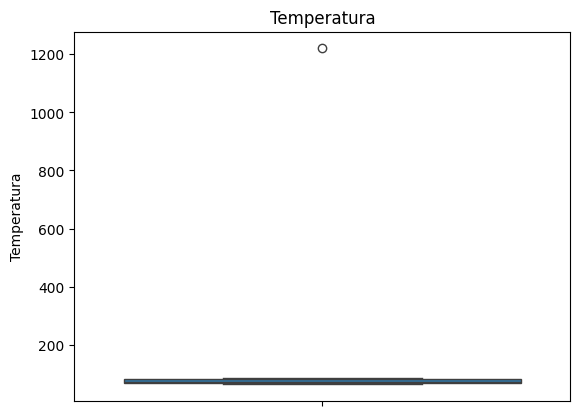

In [10]:
# Buscar outliers
sns.boxplot(dataset['Temperatura']).set_title('Temperatura')

A maioria dos dados se concentram abaixo do 200°F e mostra um outlier

In [11]:
# Umidade
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

A umidade deve estar entre 0 e 100, portanto max está muito acima.

Text(0.5, 1.0, 'Umidade')

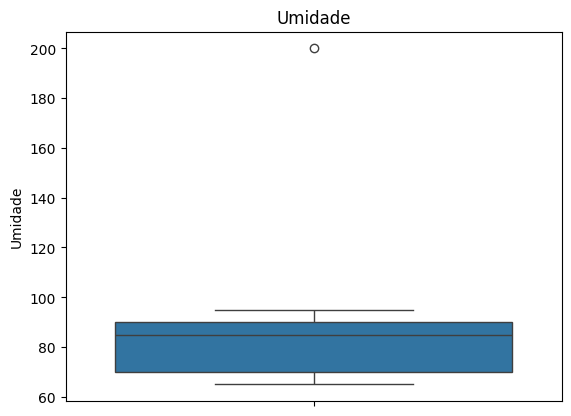

In [12]:
sns.boxplot(dataset['Umidade']).set_title('Umidade')

O boxplot demonstra os dados concentrados entre 65 e 90. com o outlier em 200

In [13]:
# Verificar os valores nulos
dataset[dataset.isnull().T.any()]

,Aparencia,Temperatura,Umidade,Vento,Jogar
3,chuva,70,NaN,FALSO,sim
9,chuva,75,200.0,NaN,sim


## Limpeza e Tratamento

In [14]:
# Aparência com valor inválido
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

O valor inválido será substituido pela moda

In [16]:
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'sol'
#visualizar o resultado
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [17]:
# Temperatura fora do domínio
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [18]:
# Visulalizar
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)] 

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


A temperatura fora do domínio será sustituida pela mediana

In [21]:
# Calcular a mediana
mediana= sts.median(dataset['Temperatura'])
mediana

73.5

In [22]:
# Substituir
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130), 'Temperatura'] = mediana

In [23]:
# Verificar se ainda existem temperaturas fora do dominio
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)] 

,Aparencia,Temperatura,Umidade,Vento,Jogar


Sem dados fora do domínio

In [24]:
dataset['Temperatura']

0     85.0
1     80.0
2     83.0
3     70.0
4     68.0
5     65.0
6     64.0
7     73.5
8     69.0
9     75.0
10    75.0
11    72.0
12    81.0
13    71.0
Name: Temperatura, dtype: float64

In [38]:
# Adicionar uma coluna  com a temperatura em °C
dataset['Temperatura_C'] = round((dataset['Temperatura'] - 32) * 5/9, 0)

In [39]:
# Verificar as alterações
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar,Temperatura_C
0,sol,85.0,85.0,FALSO,nao,29.0
1,sol,80.0,90.0,VERDADEIRO,nao,27.0
2,nublado,83.0,86.0,FALSO,sim,28.0
3,chuva,70.0,NaN,FALSO,sim,21.0
4,chuva,68.0,80.0,FALSO,sim,20.0


In [40]:
# Umidade
agrupado = dataset.groupby(['Umidade']).size()
agrupado

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

O valor fora de domínio será substituido pela mediana

In [43]:
# Visualizar os dados de acordo com o domínio
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar,Temperatura_C
9,chuva,75.0,200.0,NaN,sim,24.0


In [47]:
# Calcular a mediana
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [48]:
# Substituir com a mediana
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100), 'Umidade'] = mediana

In [49]:
# Visualizar a alteração
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar,Temperatura_C


In [50]:
# Umidade
# Dados nulos
dataset['Umidade'].isnull().sum()

1

O Dado faltante também será substituido pela mediana

In [52]:
dataset['Umidade'].fillna(mediana, inplace = True)

In [53]:
# Visualizar alteração
dataset['Umidade'].isnull().sum()

0

In [55]:
# Vento
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [56]:
# Vento
# Dados nulos
dataset['Vento'].isnull().sum()

1

O Dado faltante será substituido pela moda

In [57]:
dataset['Vento'].fillna('FALSO', inplace=True)

In [58]:
# Verificar alterações de dados nulos
dataset[dataset.isnull().T.any()]

,Aparencia,Temperatura,Umidade,Vento,Jogar,Temperatura_C


Sem dados Nulos

In [59]:
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar,Temperatura_C
0,sol,85.0,85.0,FALSO,nao,29.0
1,sol,80.0,90.0,VERDADEIRO,nao,27.0
2,nublado,83.0,86.0,FALSO,sim,28.0
3,chuva,70.0,85.5,FALSO,sim,21.0
4,chuva,68.0,80.0,FALSO,sim,20.0
